# IMPORT LIBRARY

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# DATASET

## Preparing the dataset


### Merging images folders

In [17]:
# Put all images in one folder 
def merge_folders_simple(source_folder1, source_folder2, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    
    # Helper function to copy files from a source folder to a destination folder
    def copy_files(source_folder, destination_folder):
        for filename in os.listdir(source_folder):
            source_file = os.path.join(source_folder, filename)
            destination_file = os.path.join(destination_folder, filename)
            
            # Copy the file
            shutil.copy2(source_file, destination_file)
    
    # Copy files from both source folders to the destination folder
    copy_files(source_folder1, destination_folder)
    copy_files(source_folder2, destination_folder)

# Define the paths
source_folder1 = 'dataset/HAM10000/HAM10000_images_part_1'
source_folder2 = 'dataset/HAM10000/HAM10000_images_part_2'
destination_folder = 'dataset/HAM10000/all_images'

# Merge the folders
merge_folders_simple(source_folder1, source_folder2, destination_folder)


### Loading dataset in subfolders

In [22]:
data_dir = os.getcwd() + "/dataset/HAM10000/all_images" 
dest_dir = os.getcwd() + "/dataset/HAM10000/categorized_images"

# Read the csv metadata file 
skin_mt = pd.read_csv('dataset/HAM10000/HAM10000_metadata.csv')
label_counts = skin_mt['dx'].value_counts()
print(label_counts)

# Extract data into a list
labels = skin_mt['dx'].unique().tolist()
label_images = []

# Put all the images in the corrisponding skin tumor's subfolder 
for label in labels:
    label_dir = os.path.join(dest_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    
    # Get all image IDs for the current label
    image_ids = skin_mt[skin_mt['dx'] == label]['image_id']
    
    # Copy each image to the corresponding label directory
    for image_id in image_ids:
        src = os.path.join(data_dir, f'{image_id}.jpg')
        dst = os.path.join(label_dir, f'{image_id}.jpg')
        shutil.copyfile(src, dst)

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


## Dataset Preprocessing 

Found 10015 images belonging to 7 classes.


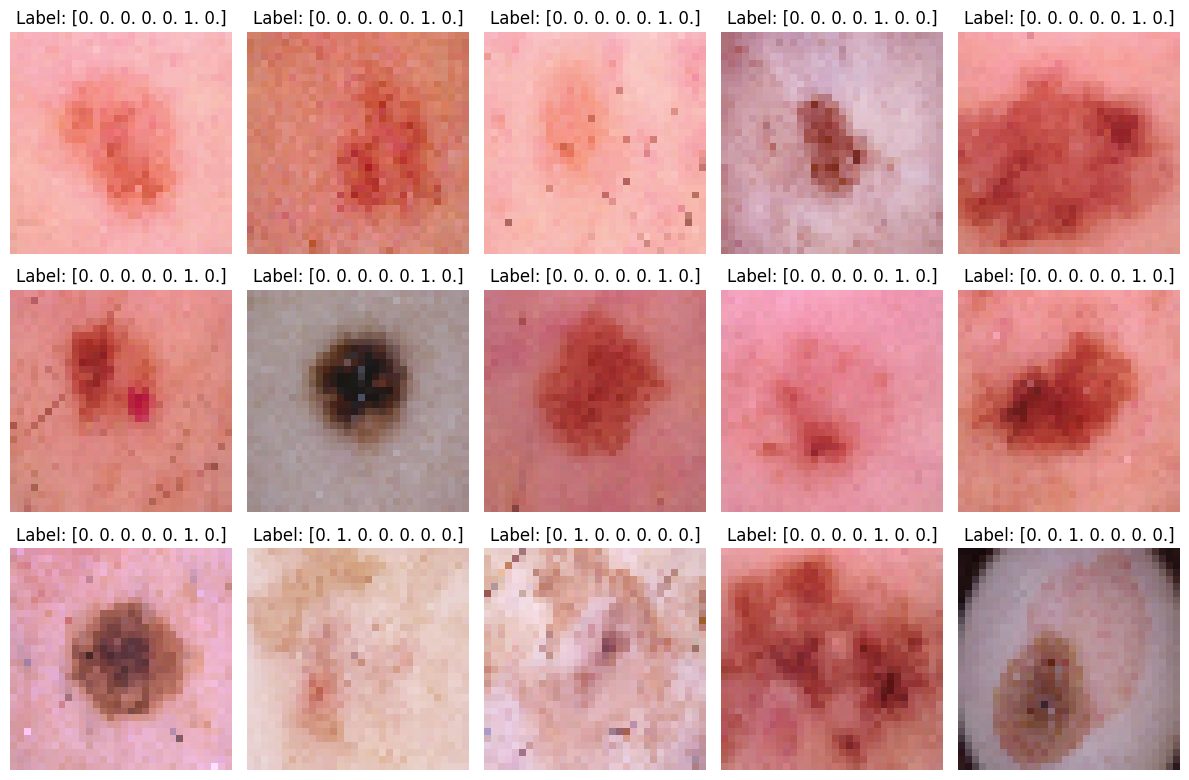

In [15]:
datagen = ImageDataGenerator()
train_dir = os.getcwd() + "/dataset/HAM10000/categorized_images"

train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                               class_mode = 'categorical',
                                               batch_size = 16,
                                               target_size = (32,32))

x, y = next(train_data_keras)

# Set up a figure with multiple subplots
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Display up to 15 images in a grid
num_images = min(15, len(x))
rows = 3
cols = 5

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    image = x[i].astype(int)
    plt.imshow(image)
    plt.title(f'Label: {y[i]}')  
    plt.axis('off')  # Turn off axis labels
plt.tight_layout()  
plt.show()